In [1]:
!pip install --q fosforio[snowflake]

ERROR: fosforml 1.0.0 has requirement PyYAML==6.0, but you'll have pyyaml 6.0.1 which is incompatible.
ERROR: fosforml 1.0.0 has requirement urllib3==1.26.15, but you'll have urllib3 1.26.18 which is incompatible.
ERROR: snowflake-snowpark-python 1.0.0 has requirement snowflake-connector-python<3.0.0,>=2.7.12, but you'll have snowflake-connector-python 3.6.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement cryptography<39.0.0,>=3.1.0, but you'll have cryptography 41.0.7 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement packaging<24,>=20.9, but you'll have packaging 24.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement snowflake-snowpark-python<2,>=1.4.0, but you'll have snowflake-snowpark-python 1.0.0 which is incompatible.
ERROR: openapi-schema-validator 0.6.2 has requirement jsonschema<5.0.0,>=4.19.1

In [2]:
!pip install --q fosforml

ERROR: fosforio 1.0.1 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-snowpark-python 1.0.0 has requirement snowflake-connector-python<3.0.0,>=2.7.12, but you'll have snowflake-connector-python 3.6.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement cryptography<39.0.0,>=3.1.0, but you'll have cryptography 41.0.7 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement packaging<24,>=20.9, but you'll have packaging 24.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement snowflake-snowpark-python<2,>=1.4.0, but you'll have snowflake-snowpark-python 1.0.0 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 2.2.5 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Jinj

# Restart Kernel here

In [1]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
import requests
import pandas as pd
import datetime as dt

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
import seaborn as sns
import subprocess

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-dobafwlr because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# Import label encoder 
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np

In [4]:
# To get snowflake connection object with a default snowflake connection created by the user, if available.
snowflake.get_connection()

# To get snowflake connection object with a specific connection name
#snowflake.get_connection(connection_name="FDC_SNOWFLAKE")

User name picked from OS env: manishh.singh@fosfor.com
Fetching connections created by manishh.singh@fosfor.com user
Connection names fetched ['FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_SNOWFLAKE'], created by manishh.singh@fosfor.com
Exception occurred in getting snowflake connection: 'connectionSources'


In [5]:
# To read a specific dataset published from a snowflake connection
df = snowflake.get_dataframe("TRANSACTION_MASTER_DATA")

In [6]:
df.shape

(328860, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328860 entries, 0 to 328859
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATE                     328860 non-null  object 
 1   WEEKDAY_FLAG             328860 non-null  object 
 2   HOLIDAY_FLAG             328860 non-null  object 
 3   BANK_ID                  328860 non-null  int8   
 4   STATE                    328860 non-null  object 
 5   BANK_NAME                328860 non-null  object 
 6   ATM_ID                   328860 non-null  object 
 7   DISPENSED_AMOUNT         328860 non-null  float64
 8   TOTAL_TRANSACTION_COUNT  328860 non-null  float64
 9   DOWNTIME_IN_MINS         328860 non-null  float64
 10  ATM_MAX_CAPACITY         328860 non-null  float64
dtypes: float64(4), int8(1), object(6)
memory usage: 25.4+ MB


In [8]:
df.head()

,DATE,WEEKDAY_FLAG,HOLIDAY_FLAG,BANK_ID,STATE,BANK_NAME,ATM_ID,DISPENSED_AMOUNT,TOTAL_TRANSACTION_COUNT,DOWNTIME_IN_MINS,ATM_MAX_CAPACITY
0,2023-01-29,Y,N,3,Maine,Citibank,TBH000274025,225180.0,90.0,0.0,2860000.0
1,2023-01-30,Y,N,3,Maine,Citibank,TBH000274025,262440.0,117.0,0.0,2860000.0
2,2023-01-31,Y,N,3,Maine,Citibank,TBH000274025,561150.0,160.0,0.0,2860000.0
3,2023-02-01,Y,N,3,Maine,Citibank,TBH000274025,437220.0,129.0,0.0,2860000.0
4,2023-02-02,Y,N,3,Maine,Citibank,TBH000274025,360900.0,119.0,0.0,2860000.0


In [9]:
df.columns

Index(['DATE', 'WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'BANK_NAME',
       'ATM_ID', 'DISPENSED_AMOUNT', 'TOTAL_TRANSACTION_COUNT',
       'DOWNTIME_IN_MINS', 'ATM_MAX_CAPACITY'],
      dtype='object')

In [10]:
df.isnull().sum()

DATE                       0
WEEKDAY_FLAG               0
HOLIDAY_FLAG               0
BANK_ID                    0
STATE                      0
BANK_NAME                  0
ATM_ID                     0
DISPENSED_AMOUNT           0
TOTAL_TRANSACTION_COUNT    0
DOWNTIME_IN_MINS           0
ATM_MAX_CAPACITY           0
dtype: int64

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['HOUR'] = df['DATE'].dt.hour
df['DAYOFWEEK'] = df['DATE'].dt.dayofweek
df['QUARTER'] = df['DATE'].dt.quarter
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAYOFYEAR'] = df['DATE'].dt.dayofyear
df['DAYOFMONTH'] = df['DATE'].dt.day

In [12]:
df['WEEKDAY_FLAG'] = df['WEEKDAY_FLAG'].map({'Y': 1, 'N': 0})
df['HOLIDAY_FLAG'] = df['HOLIDAY_FLAG'].map({'Y': 1, 'N': 0})

In [13]:
df.head()

,DATE,WEEKDAY_FLAG,HOLIDAY_FLAG,BANK_ID,STATE,BANK_NAME,ATM_ID,DISPENSED_AMOUNT,TOTAL_TRANSACTION_COUNT,DOWNTIME_IN_MINS,ATM_MAX_CAPACITY,HOUR,DAYOFWEEK,QUARTER,MONTH,YEAR,DAYOFYEAR,DAYOFMONTH
0,2023-01-29,1,0,3,Maine,Citibank,TBH000274025,225180.0,90.0,0.0,2860000.0,0,6,1,1,2023,29,29
1,2023-01-30,1,0,3,Maine,Citibank,TBH000274025,262440.0,117.0,0.0,2860000.0,0,0,1,1,2023,30,30
2,2023-01-31,1,0,3,Maine,Citibank,TBH000274025,561150.0,160.0,0.0,2860000.0,0,1,1,1,2023,31,31
3,2023-02-01,1,0,3,Maine,Citibank,TBH000274025,437220.0,129.0,0.0,2860000.0,0,2,1,2,2023,32,1
4,2023-02-02,1,0,3,Maine,Citibank,TBH000274025,360900.0,119.0,0.0,2860000.0,0,3,1,2,2023,33,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328860 entries, 0 to 328859
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DATE                     328860 non-null  datetime64[ns]
 1   WEEKDAY_FLAG             328860 non-null  int64         
 2   HOLIDAY_FLAG             328860 non-null  int64         
 3   BANK_ID                  328860 non-null  int8          
 4   STATE                    328860 non-null  object        
 5   BANK_NAME                328860 non-null  object        
 6   ATM_ID                   328860 non-null  object        
 7   DISPENSED_AMOUNT         328860 non-null  float64       
 8   TOTAL_TRANSACTION_COUNT  328860 non-null  float64       
 9   DOWNTIME_IN_MINS         328860 non-null  float64       
 10  ATM_MAX_CAPACITY         328860 non-null  float64       
 11  HOUR                     328860 non-null  int32         
 12  DAYOFWEEK       

In [15]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['STATE']= label_encoder.fit_transform(df['STATE'])

In [16]:
# how to understand word labels. 
atm_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['ATM_ID']= atm_encoder.fit_transform(df['ATM_ID'])

In [17]:
df.drop(['DATE','BANK_NAME','TOTAL_TRANSACTION_COUNT','DOWNTIME_IN_MINS','ATM_MAX_CAPACITY'], axis=1,inplace=True)

In [18]:
df.columns

Index(['WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'ATM_ID',
       'DISPENSED_AMOUNT', 'HOUR', 'DAYOFWEEK', 'QUARTER', 'MONTH', 'YEAR',
       'DAYOFYEAR', 'DAYOFMONTH'],
      dtype='object')

In [19]:
features = ['WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'ATM_ID',
    'HOUR', 'DAYOFWEEK', 'QUARTER', 'MONTH', 'YEAR',
       'DAYOFYEAR', 'DAYOFMONTH']

In [20]:
print (df.shape)
df = df[df['DISPENSED_AMOUNT'] > 0]
print (df.shape)

(328860, 13)
(271800, 13)


In [21]:
X = df[features]
y = df['DISPENSED_AMOUNT']

In [22]:
X.head()

,WEEKDAY_FLAG,HOLIDAY_FLAG,BANK_ID,STATE,ATM_ID,HOUR,DAYOFWEEK,QUARTER,MONTH,YEAR,DAYOFYEAR,DAYOFMONTH
0,1,0,3,18,315,0,6,1,1,2023,29,29
1,1,0,3,18,315,0,0,1,1,2023,30,30
2,1,0,3,18,315,0,1,1,1,2023,31,31
3,1,0,3,18,315,0,2,1,2,2023,32,1
4,1,0,3,18,315,0,3,1,2,2023,33,2


In [23]:
y

0         225180.0
1         262440.0
2         561150.0
3         437220.0
4         360900.0
            ...   
328855    195300.0
328856    245160.0
328857    222480.0
328858    198360.0
328859    314190.0
Name: DISPENSED_AMOUNT, Length: 271800, dtype: float64

In [24]:
# Split the data into training and test sets. (0.75, 0.25) split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [25]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 271800
**************************************************
Total # of sample in train dataset: 203850
Shape of X_train: (203850, 12)
**************************************************
Total # of sample in test dataset: 67950
Shape of X_test: (67950, 12)


In [26]:
model = LinearRegression(fit_intercept = True)

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 11.806733979609984
Test score of trained model: 11.938226264188723


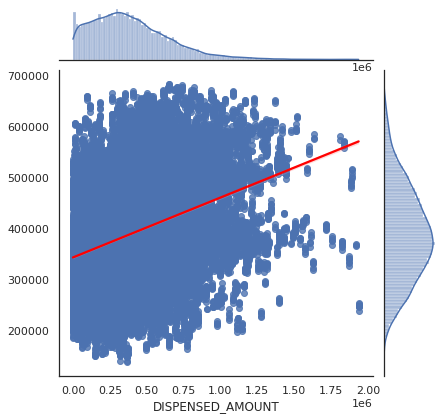

In [89]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=y_pred, kind='reg', line_kws={"color": "red"})

In [30]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [31]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'ADJ_R2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,6.141972e+10
1,RMSE,2.478300e+05
2,MAE,1.945806e+05
3,MAPE,5.253688e+02
4,R2,1.193823e-01
5,ADJ_R2,1.192267e-01


# Polynominal Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=1)

In [33]:
X_columns = poly_regressor.fit_transform(X_train)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_columns, y_train)

pred = model.predict(poly_regressor.fit_transform(X_train))

# Lasso

In [40]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 11.74340679266267
Test score of trained model: 11.875989649001973


In [41]:
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'ADJ_R2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,6.146313e+10
1,RMSE,2.479176e+05
2,MAE,1.946233e+05
3,MAPE,5.253767e+02
4,R2,1.187599e-01
5,ADJ_R2,1.186042e-01


# Ridge

In [42]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 11.806733979603623
Test score of trained model: 11.93822627801715


In [43]:
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'ADJ_R2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,6.141972e+10
1,RMSE,2.478300e+05
2,MAE,1.945806e+05
3,MAPE,5.253688e+02
4,R2,1.193823e-01
5,ADJ_R2,1.192267e-01


# Elastic Net

In [44]:
e_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
e_net.fit(X_train, y_train)

pred = e_net.predict(X_test)

train_score = e_net.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = e_net.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 11.701472954352122
Test score of trained model: 11.850733027138705


In [45]:
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'ADJ_R2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,6.148075e+10
1,RMSE,2.479531e+05
2,MAE,1.946791e+05
3,MAPE,5.276371e+02
4,R2,1.185073e-01
5,ADJ_R2,1.183516e-01
